In [1]:
suppressPackageStartupMessages({
  library(pagoda2)
  library(Seurat)
  library(dplyr)
  library(ggplot2)
  library(ComplexHeatmap)  
  library(circlize)
  library(CellChat)
  library(patchwork)
})

In [3]:
fig.size <- function (height, width, res=300) {
    options(repr.plot.height = height, repr.plot.width = width, resolution=res)
}

In [36]:
obj.human = readRDS(
    glue::glue('../cellchat_objects/human_cellchat.rds')
)

obj.mouse = readRDS(
   glue::glue('../cellchat_objects/mouse_cellchat.rds')
)

In [37]:
intersect(
    obj.mouse@netP$pathways,
    obj.human@netP$pathways
)

[1] "APP"    "MHC-I"  "CDH5"   "PECAM1" "NOTCH"  "SELPLG" "ESAM"   "SELL"  
 [9] "NCAM"   "CADM"   "ICAM"   "MPZ"

In [40]:
pairLR.use.mouse = extractEnrichedLR(obj.mouse, signaling = intersect(
    obj.mouse@netP$pathways,
    obj.human@netP$pathways   
))

In [41]:
pairLR.use.human = extractEnrichedLR(obj.human, signaling = intersect(
    obj.mouse@netP$pathways,
    obj.human@netP$pathways   
))

Comparing communications on a single object 




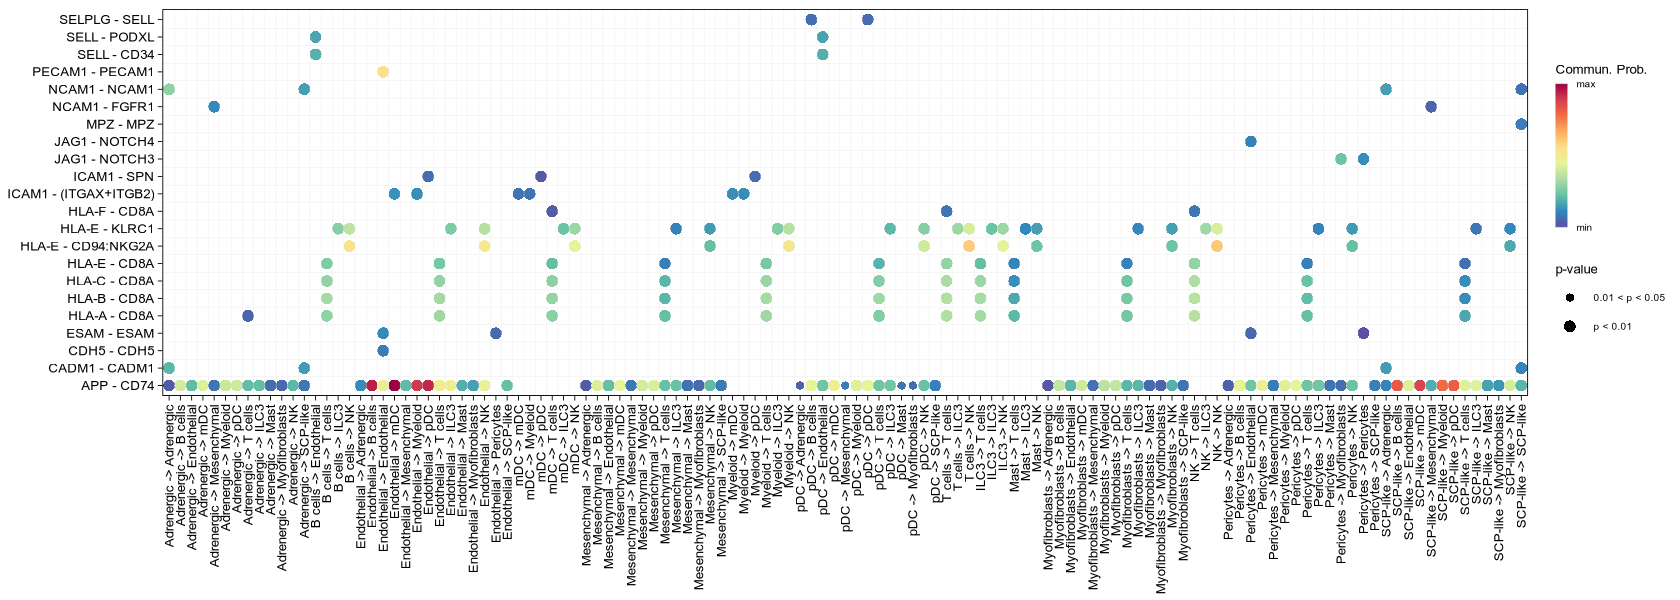

In [48]:
options(repr.plot.height=5, repr.plot.width=14, res=200)
netVisual_bubble(obj.human,  signaling = intersect(
    obj.mouse@netP$pathways,
    obj.human@netP$pathways
),
                 #pairLR.use = pairLR.use, 
                 remove.isolate = TRUE)

Comparing communications on a single object 




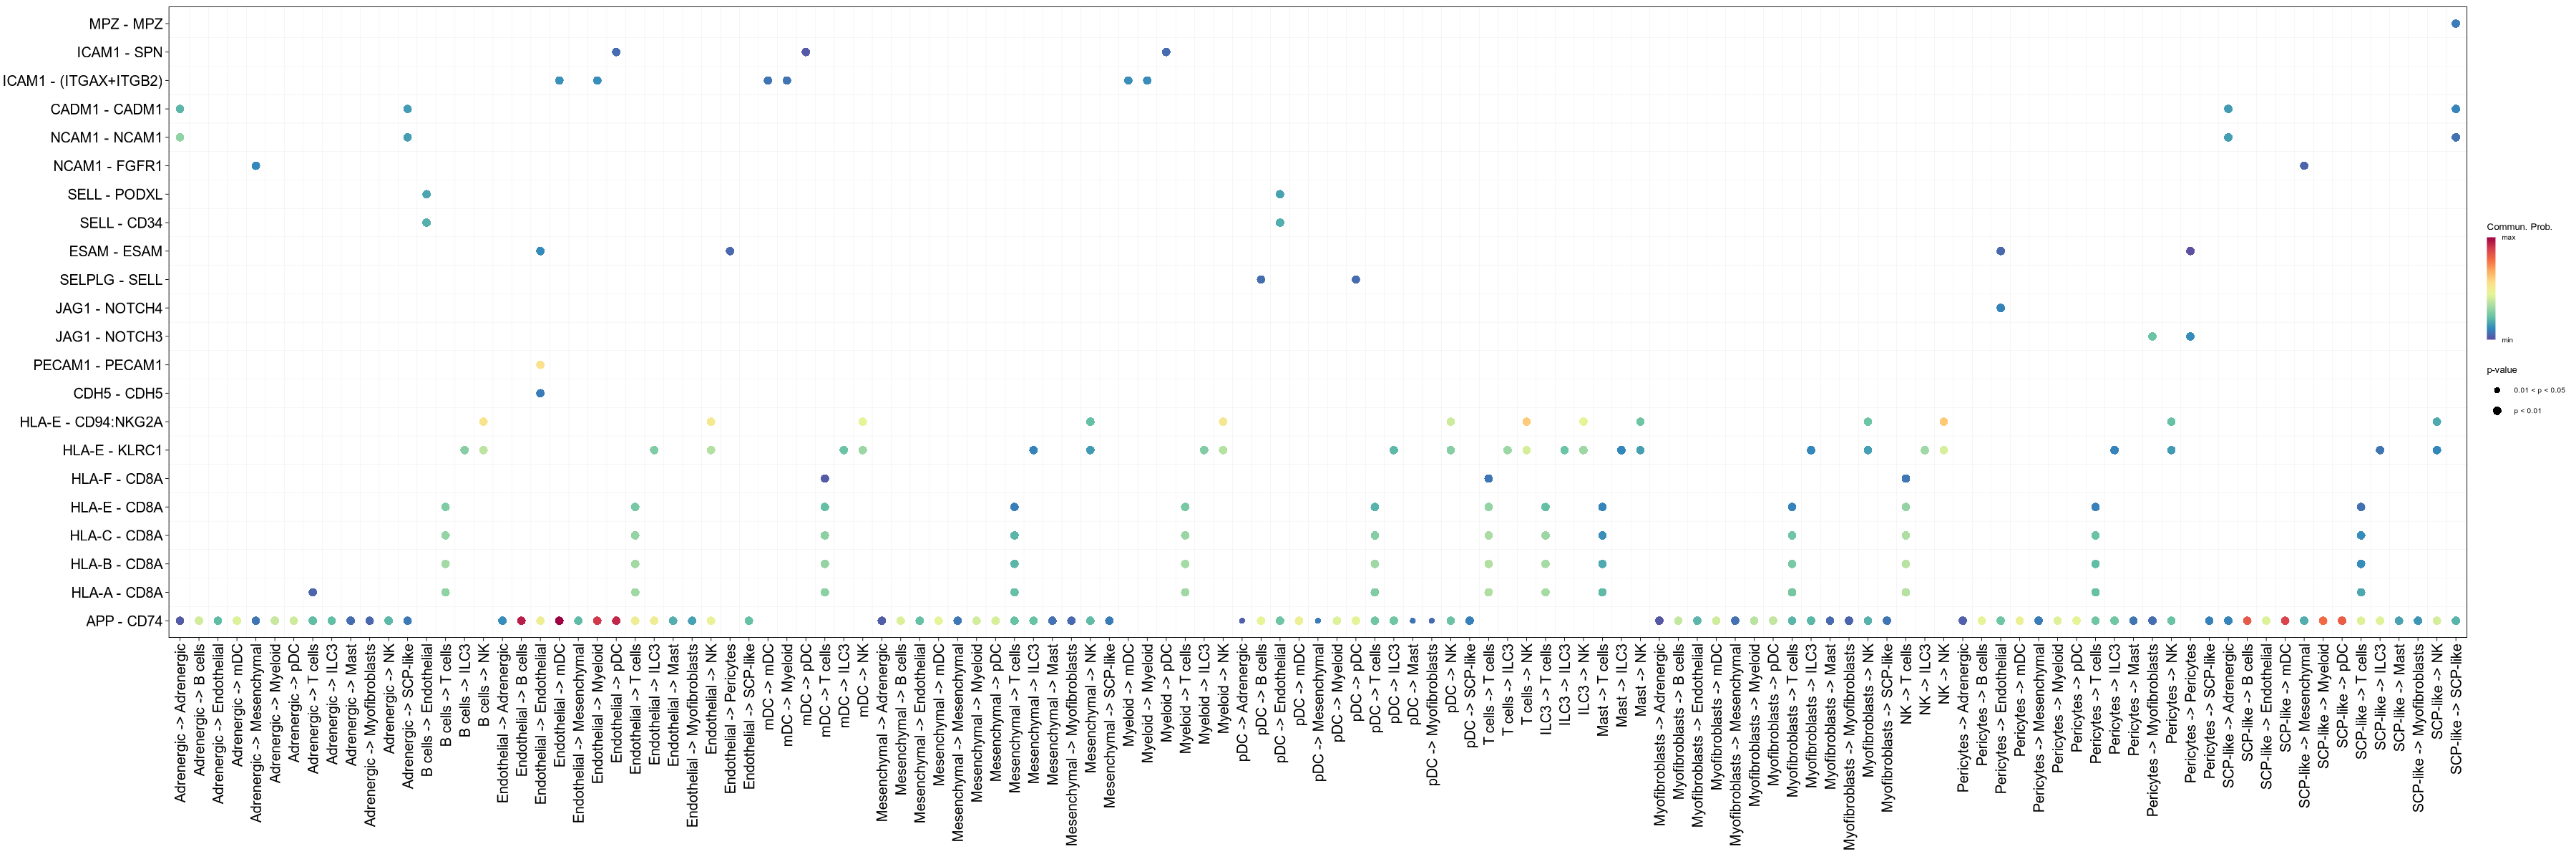

In [45]:
options(repr.plot.height=10, repr.plot.width=30, res=200)
p1 = netVisual_bubble(obj.human,
                      pairLR.use = pairLR.use.human,
                 #sources.use=6,
                 remove.isolate = FALSE,font.size = 15)
p1

Comparing communications on a single object 




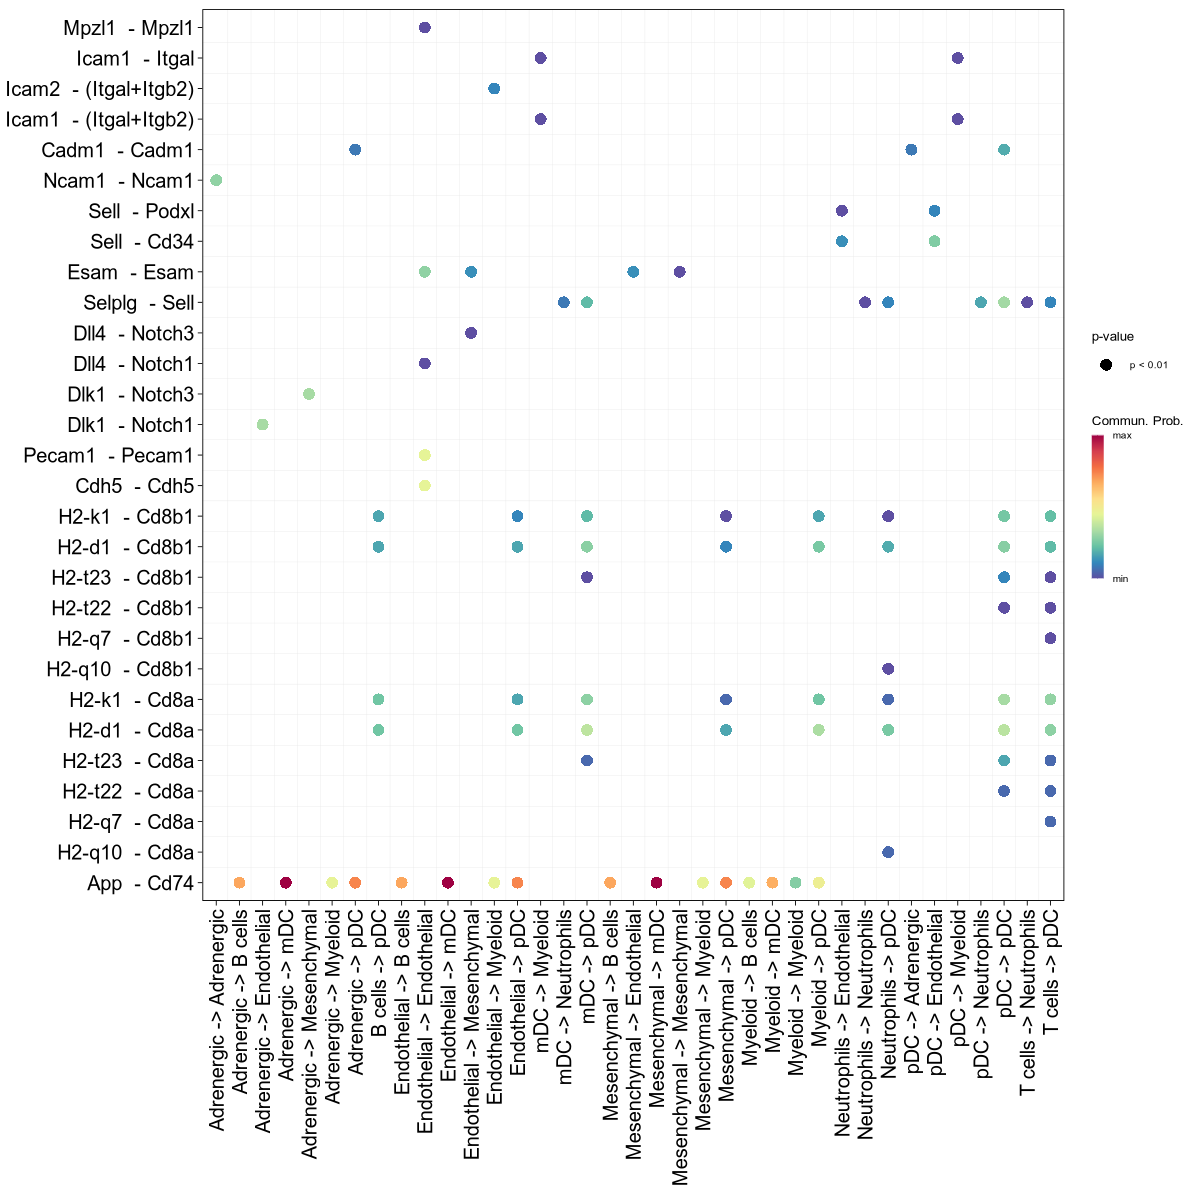

In [47]:
options(repr.plot.height=10, repr.plot.width=10, res=200)
p1 = netVisual_bubble(obj.mouse,
                      pairLR.use = pairLR.use.mouse,
                 #sources.use=6,
                 remove.isolate = FALSE,font.size = 15)
p1

In [50]:
obj.human.dong = readRDS(
    glue::glue('cellchat/dong_6_sample_cellchat.rds'
              )
    )

In [55]:
intersect(
    obj.mouse@netP$pathways,
    obj.human.dong@netP$pathways
)

[1] "APP"    "MHC-I"  "CDH5"   "PECAM1" "NOTCH"  "SELPLG" "ESAM"   "SELL"  
 [9] "NCAM"   "CADM"   "ICAM"   "JAM"    "MPZ"

Comparing communications on a single object 




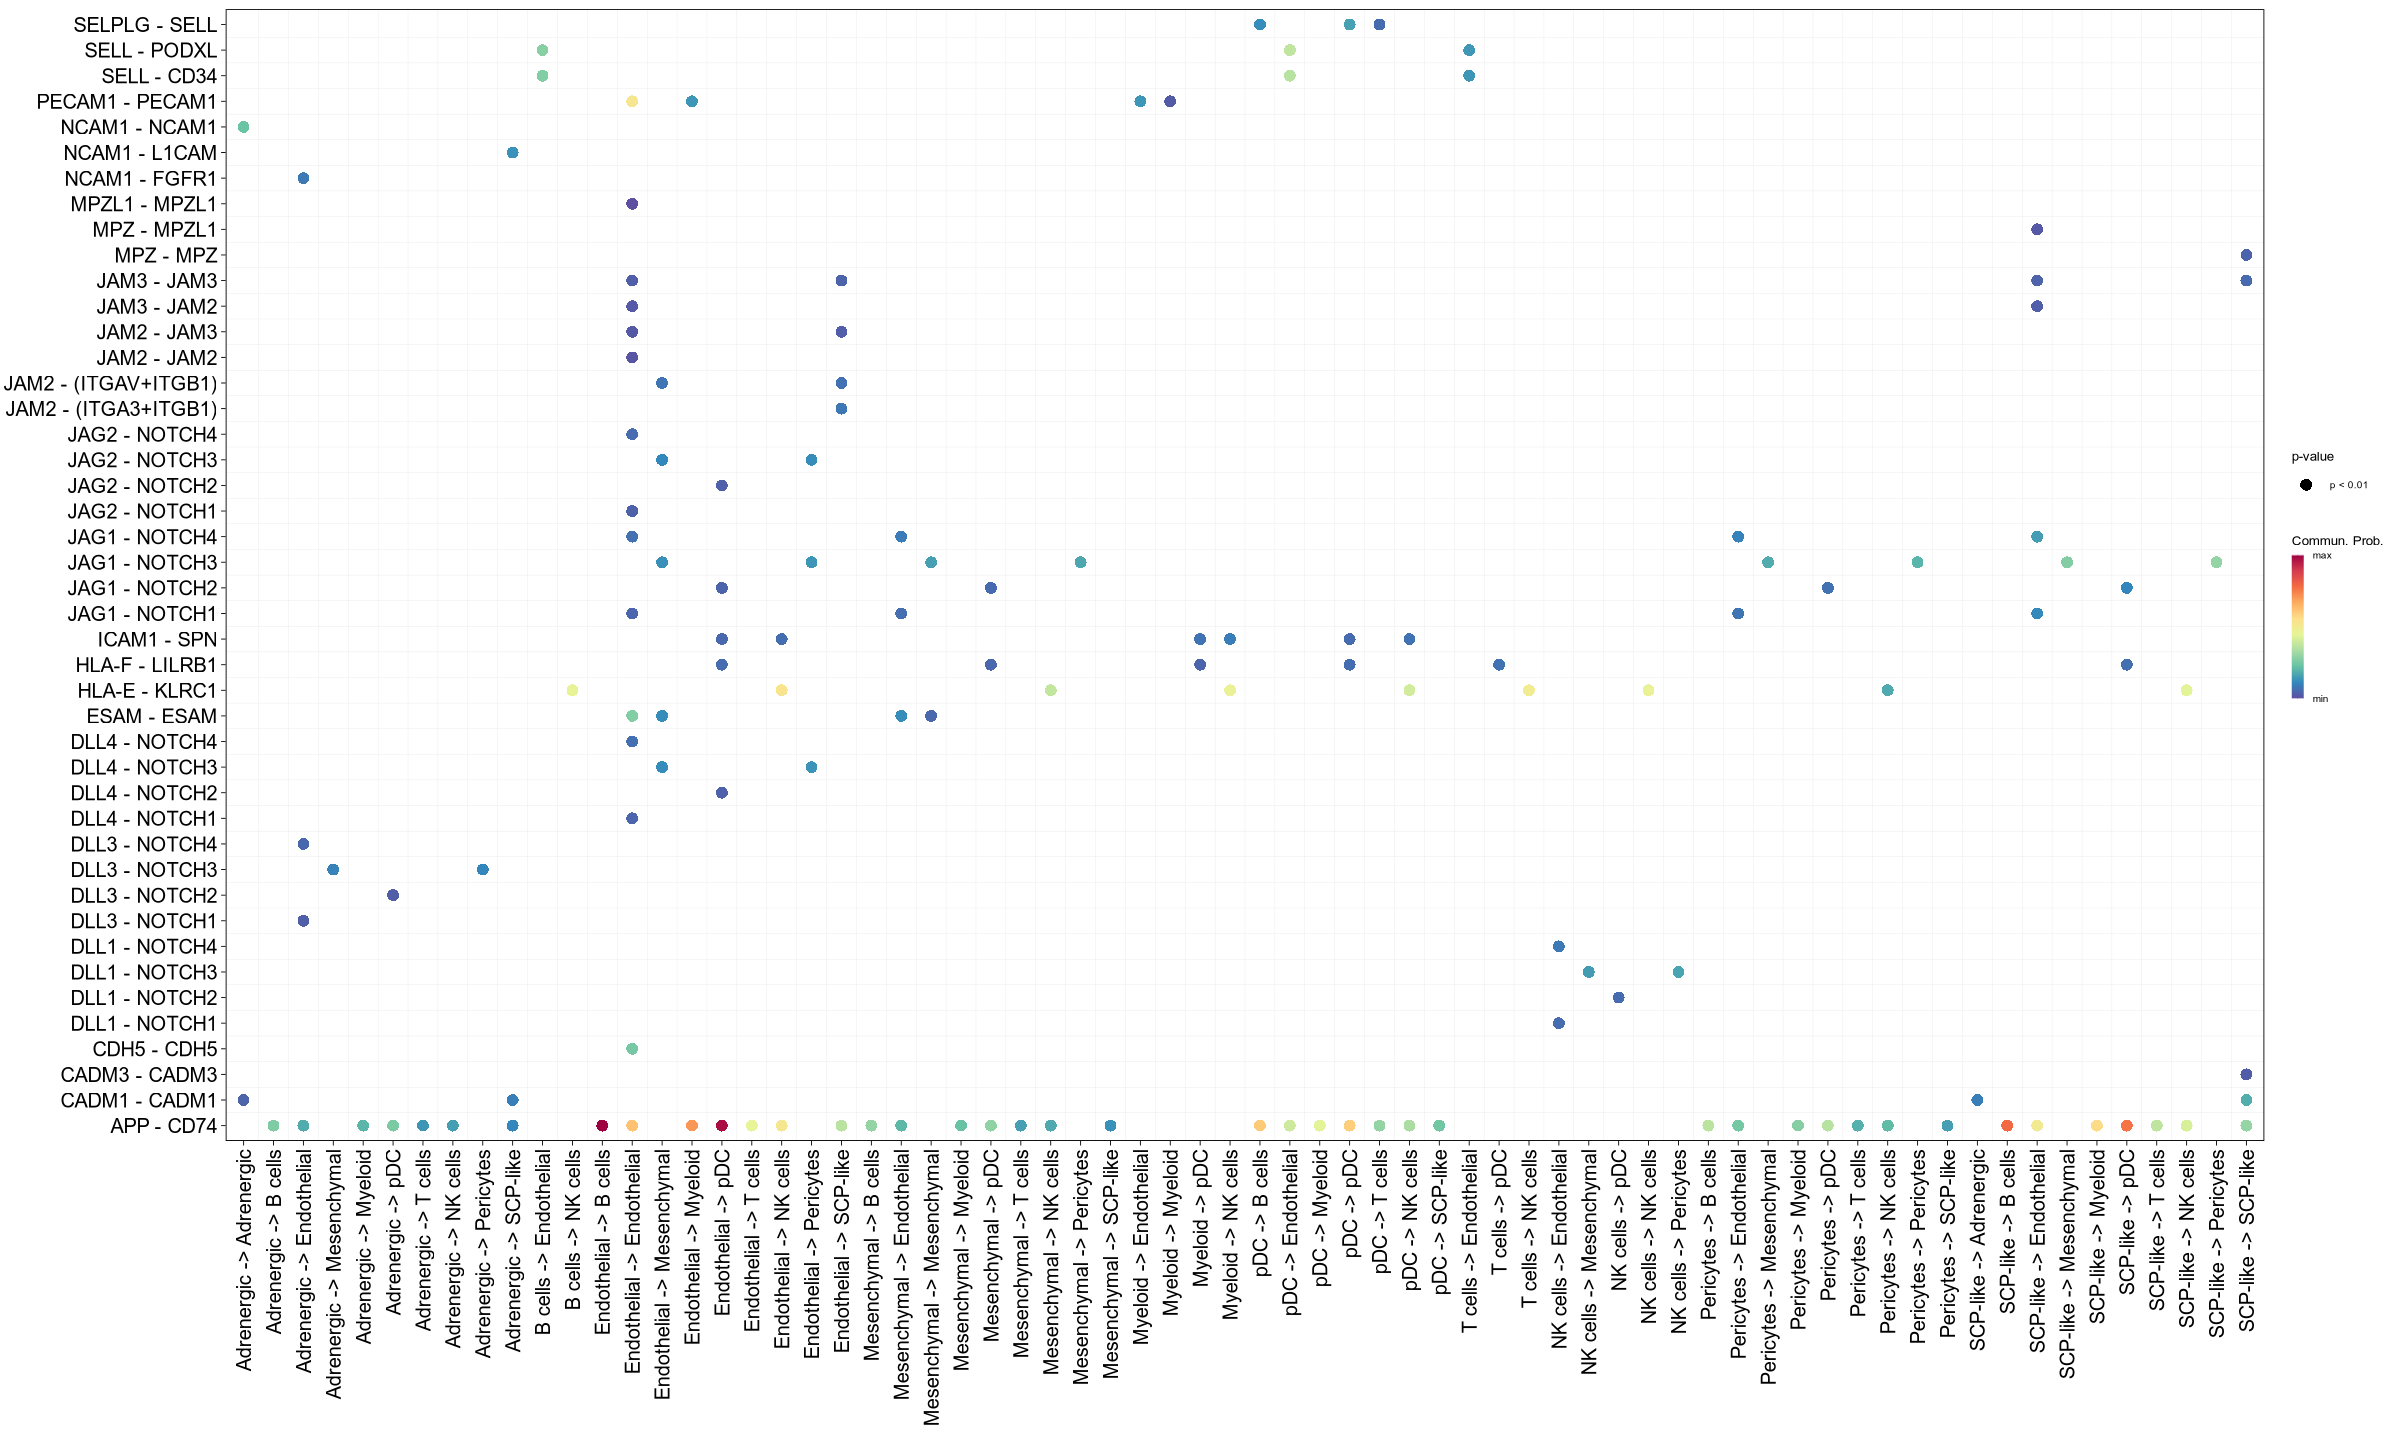

In [59]:
fig.size(12,20)
p1 = netVisual_bubble(obj.human.dong,
                      signaling = intersect(
    obj.mouse@netP$pathways,
    obj.human.dong@netP$pathways
),
                 #sources.use=6,
                 remove.isolate = FALSE,font.size = 15)
p1

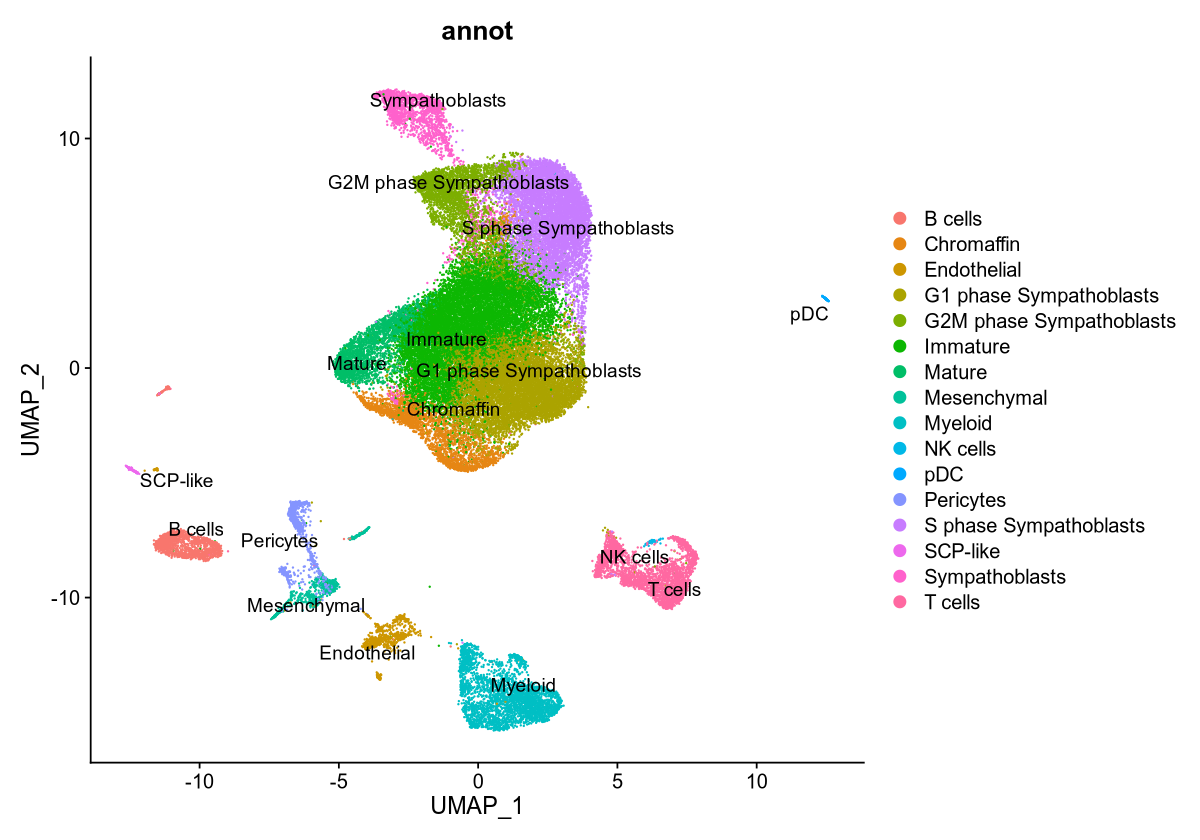

In [6]:
fig.size(7,10)
p1 = DimPlot(hsc, 
    group.by = 'annot',
    reduction = "umap", 
    label = TRUE, 
    repel = TRUE
)
p1

In [20]:
obj.human <- netAnalysis_computeCentrality(obj.human, slot.name = "netP")

In [29]:
obj.human@idents %>% levels

[1] "Adrenergic"     "B cells"        "Endothelial"    "mDC"           
 [5] "Mesenchymal"    "Myeloid"        "pDC"            "T cells"       
 [9] "ILC3"           "Mast"           "Myofibroblasts" "NK"            
[13] "Pericytes"      "SCP-like"

Comparing communications on a single object 




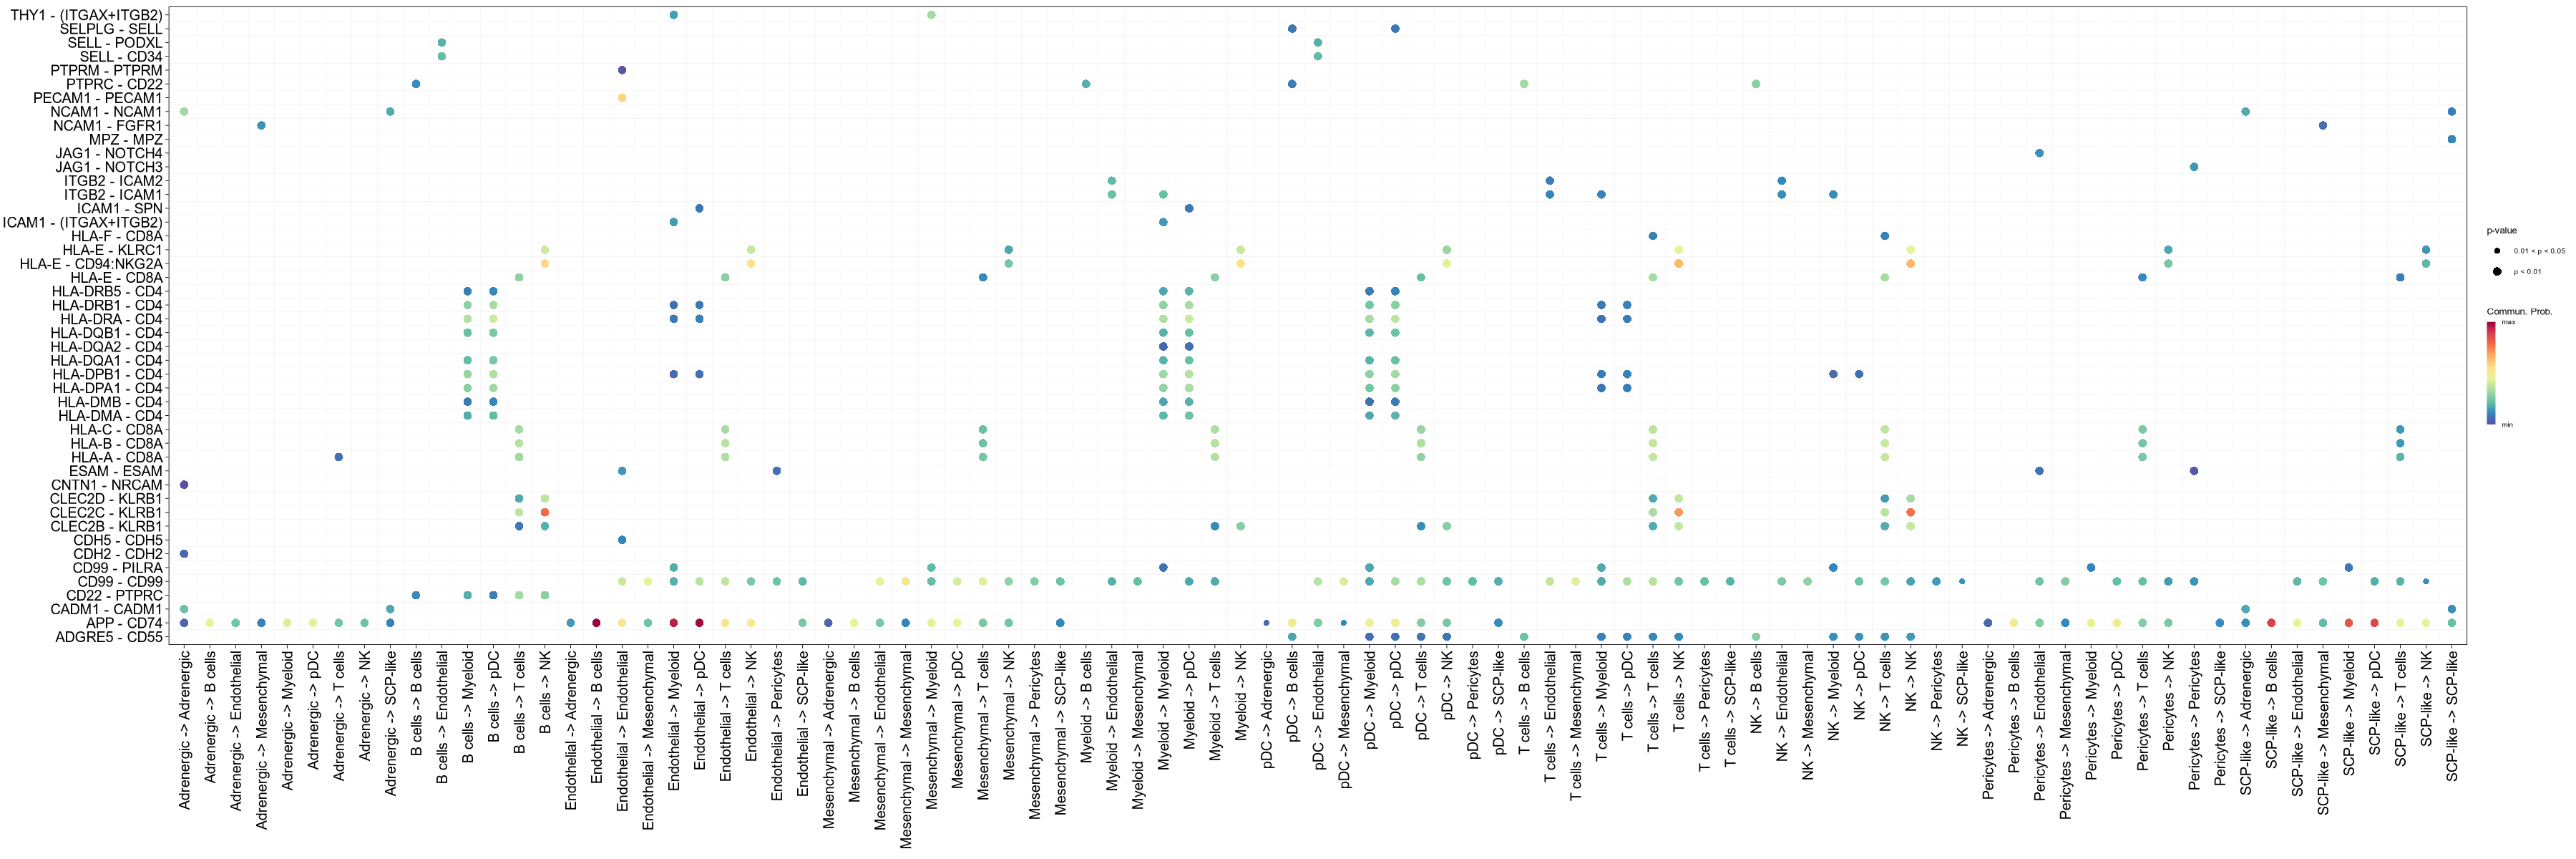

In [33]:
fig.size(10,30)
groupSize <- as.numeric(table(obj.human@idents))
netVisual_bubble(
    obj.human, 
    sources.use = c(1,2,3,5,6,7,8,12,13,14), 
    targets.use = c(1,2,3,5,6,7,8,12,13,14),
    remove.isolate = TRUE,
    font.size = 15
) 